In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.clean import Clean


immo_df = pd.read_csv('../data/cleaned/appended_data.csv')

immo_df = Clean().exclude_outliers(immo_df)

map = {
    'TO_RESTORE': 1,
    'TO_RENOVATE': 2,
    'TO_BE_DONE_UP': 3,
    'GOOD': 4,
    'JUST_RENOVATED': 5,
    'AS_NEW': 6
}
immo_df['State of Building'] = immo_df['State of Building'].apply(lambda x: map.get(x, np.NAN))

energy_ratings = {
    "G": 0,
    "F": 1,
    "E": 2,
    "D": 3,
    "C": 4,
    "B": 5,
    "A": 6,
    "A+": 7,
    "A++": 8
}
immo_df['EPC'] = immo_df['EPC'].apply(lambda x: energy_ratings.get(x, np.NAN))
kitchen_types={
    "NOT_INSTALLED": 1,
    "USA_UNINSTALLED": 1,
    "SEMI_EQUIPPED": 2,
    "USA_SEMI_EQUIPPED": 2,
    "INSTALLED": 3,
    "USA_INSTALLED": 3,
    "HYPER_EQUIPPED": 4,
    "USA_HYPER_EQUIPPED": 4,
}
immo_df['Kitchen Type'] = immo_df['Kitchen Type'].apply(lambda x: kitchen_types.get(x, np.NAN))

# prevent print of data frame trunking
pd.set_option('display.max_columns', None)
subset = immo_df.loc[:,['EPC', 'State of Building', 'Kitchen Type']]

common_columns = ['Room Count', 'Habitable Surface', 'Build Year', "Kitchen Type", 'EPC', 'State of Building', "Kitchen Surface"]
house_only_columns = ["Facades", 'Land Surface', ]
appartment_only_columns = ["Terrace Surface", ]
house_columns = common_columns + house_only_columns
appartment_columns = common_columns + appartment_only_columns

dropping fireplace count column


# HOUSES

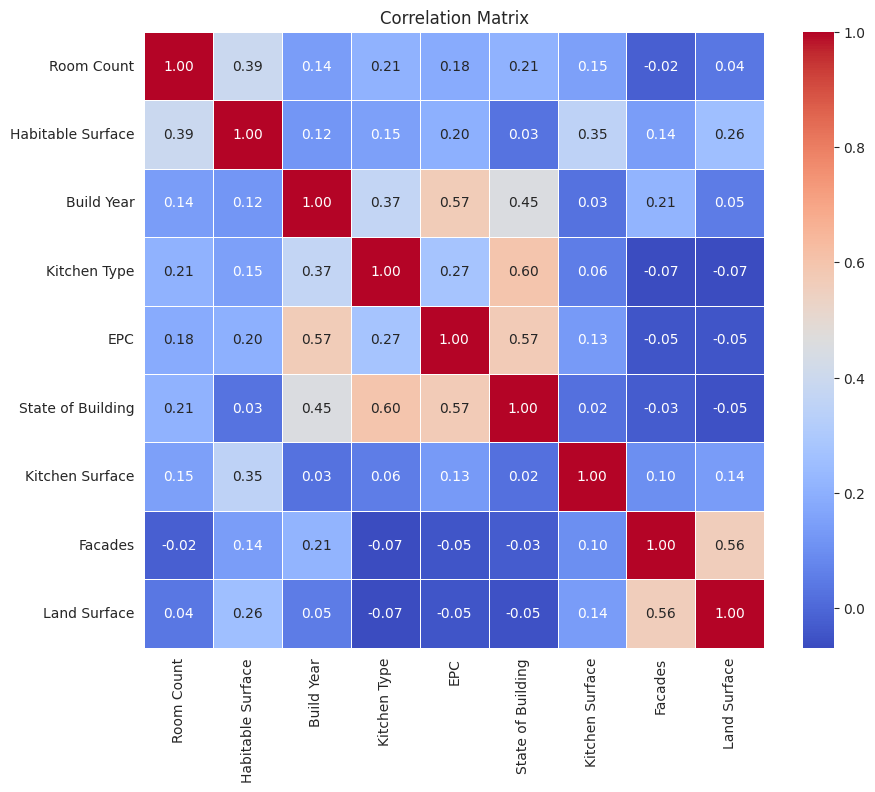

In [17]:
houses = immo_df[immo_df['Type'] == 'HOUSE']

corr_matrix = houses[house_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

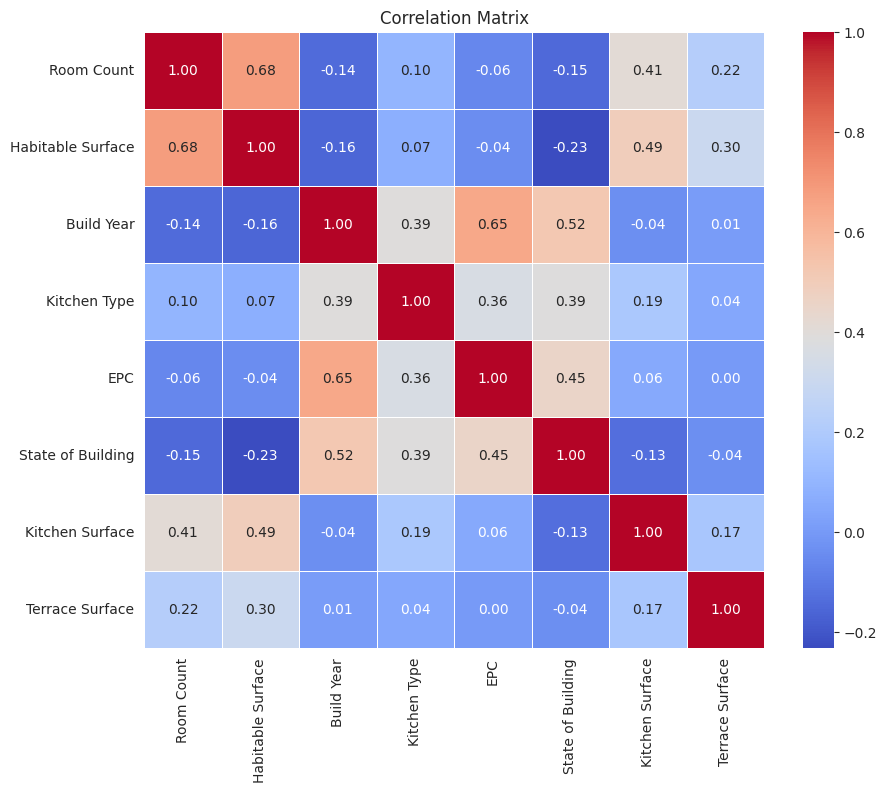

In [18]:
appartments = immo_df[immo_df['Type'] == 'APARTMENT']

corr_matrix = immo_df[appartment_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()